In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [2]:
data1 = pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv", index_col=0)

In [3]:
data1

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
##Which columns are numerical?
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data1 = data1.select_dtypes(include=numerics)



In [5]:
numeric_data1

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [6]:
##Which columns are categorical?
data1.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [7]:
## Categorical columns : "State" "Response" "Coverage" "Education" "EmploymentStatus" "Gender" "Location Code" 
##"Marital Status" "Policy Type" "Policy" "Renew Offer Type" "Sales Channel" "Vehicle Class" "Vehicle Size" 
##"Vehicle Type"

In [8]:
##Datetime format - Extract the months from the dataset and store in a separate column. 
##Then filter the data to show only the information for the first quarter , ie. January, February and March. 
##Hint: If data from March does not exist, consider only January and February.


In [9]:
data1[["Effective To Date"]]

,Effective To Date
0,2/18/11
1,1/18/11
2,2/10/11
3,1/11/11
4,1/17/11
...,...
10905,1/19/11
10906,1/6/11
10907,2/6/11
10908,2/13/11


In [10]:
data1["new_column"] = data1["Effective To Date"]

In [11]:
##data1[["new_col_month", "new_col_dateofmonth", "new_col_year"]] = data1.new_column.str.split(pat="/", expand=True)
##data1.replace({"new_col_month" : {"1" : "January", "2" : "February", "3" : "March" }})


In [12]:
def extract_month(x):
    x = x.split("/")[0]
    if x == "1":
        return "January"
    elif x == "2":
        return "February"
    

data1["new_column"] = list(map(extract_month, data1["new_column"]))

In [13]:

first_q=["January", "February", "March"]

data_first_q = data1.loc[data1['new_column'].isin(first_q)] 

In [14]:
data_first_q

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,new_column
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,February
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,February
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February


In [15]:
##Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
##(You can use np.number and np.object to select the numerical data types and categorical data types respectively)


In [16]:
numerical = data1.select_dtypes(include=np.number)
categoricals = data1.select_dtypes(include=np.object)


/var/folders/xw/scy5flt94d56tjrc4x62mjrc0000gn/T/ipykernel_29196/4010582519.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data1.select_dtypes(include=np.object)


<AxesSubplot:xlabel='Total Claim Amount', ylabel='Density'>

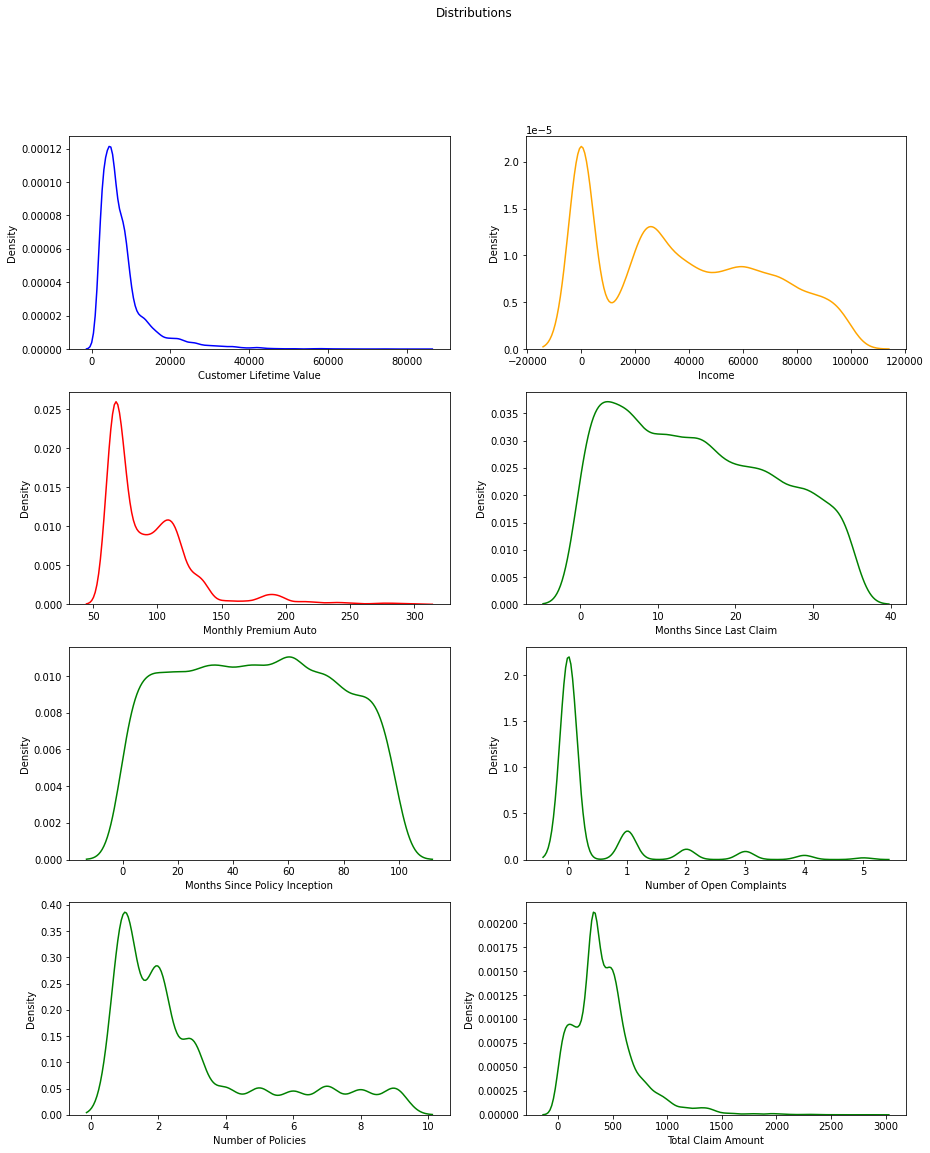

In [17]:
figdist, ax = plt.subplots(4,2, figsize = (15, 18))
plt.suptitle("Distributions")


sns.kdeplot(numerical['Customer Lifetime Value'], color= 'blue', ax=ax[0,0])

sns.kdeplot(numerical['Income'], color= 'orange', ax=ax[0,1])

sns.kdeplot(numerical['Monthly Premium Auto'],color= 'red', ax=ax[1,0])

sns.kdeplot(numerical['Months Since Last Claim'],  color= 'green', ax=ax[1,1])

sns.kdeplot(numerical['Months Since Policy Inception'],  color= 'green', ax=ax[2,0])

sns.kdeplot(numerical['Number of Open Complaints'],  color= 'green', ax=ax[2,1])

sns.kdeplot(numerical['Number of Policies'],  color= 'green', ax=ax[3,0])

sns.kdeplot(numerical['Total Claim Amount'],  color= 'green', ax=ax[3,1])

Text(0.5, 0, 'Customer Lifetime Value')

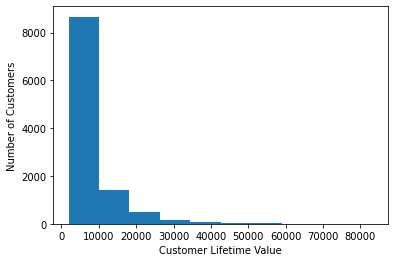

In [18]:
plt.hist(numerical['Customer Lifetime Value'], bins= 10) 
plt.ylabel('Number of Customers')
plt.xlabel('Customer Lifetime Value')

Text(0.5, 0, 'Income')

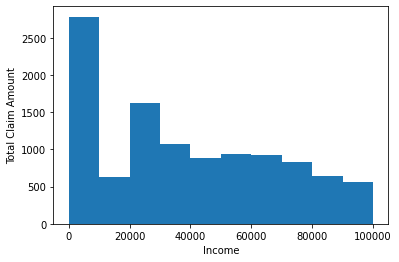

In [19]:
plt.hist(numerical['Income'], bins = 10)
plt.ylabel('Total Claim Amount')
plt.xlabel('Income')

In [20]:
numerical.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626
Income,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141
Monthly Premium Auto,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799
Months Since Last Claim,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
Months Since Policy Inception,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095
Number of Open Complaints,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
Number of Policies,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923
Total Claim Amount,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000


In [21]:
## no data shows a correlation higher than 0.9


Text(0.5, 0.98, 'Responses')

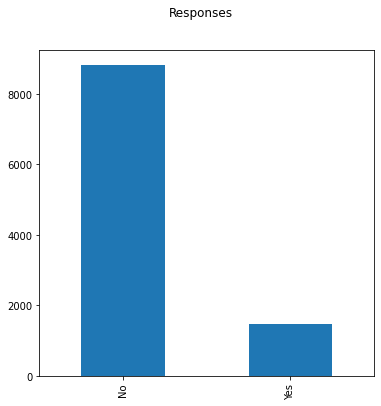

In [22]:
figresponse, ax = plt.subplots (figsize=(6,6))

data1["Response"].value_counts().plot(kind='bar')

plt.suptitle("Responses")

In [23]:
response_rate = data1.groupby(['Sales Channel','Response'])['Customer'].count().reset_index()


<AxesSubplot:title={'center':'Response Rate by Sales Channel'}, xlabel='Sales Channel', ylabel='Customer'>

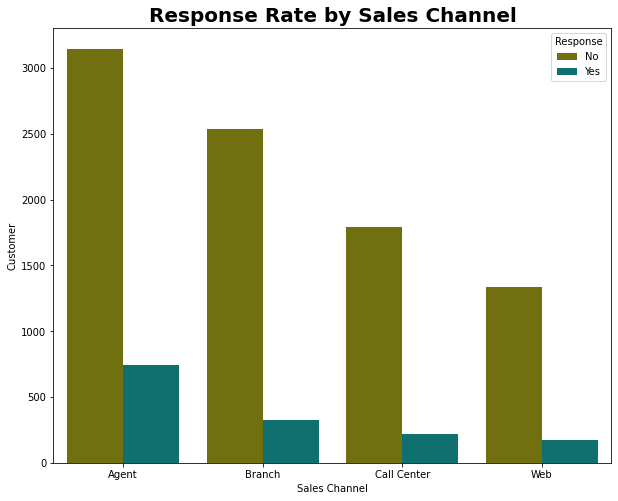

In [24]:
sns.color_palette("husl", 7) 
palette_used = {"Yes": "teal", "No": "olive"} 

fig_sales_channel, ax = plt.subplots(figsize = (10, 8)) 
ax.set_title('Response Rate by Sales Channel', size='20', fontweight='bold')

sns.barplot(x = response_rate['Sales Channel'], y = response_rate['Customer'], hue = response_rate['Response'], ax = ax, palette=palette_used)

In [25]:
response_claim = data1.groupby(['Total Claim Amount','Response'])['Customer'].count().reset_index()
response_claim


,Total Claim Amount,Response,Customer
0,0.099007,No,1
1,0.382107,No,2
2,0.423310,No,2
3,0.517753,No,1
4,0.769185,No,1
...,...,...,...
5161,2345.413441,No,1
5162,2452.894264,No,1
5163,2552.343856,No,2
5164,2759.794354,No,1


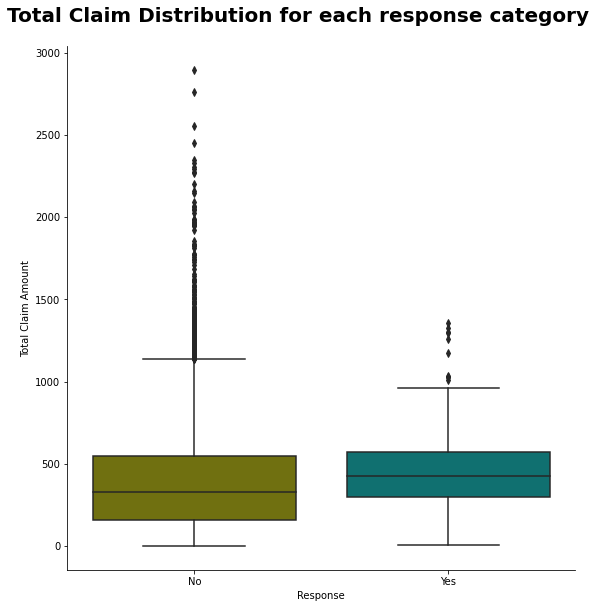

In [26]:
figclaim = sns.catplot(x='Response', y = 'Total Claim Amount', data = response_claim, kind="box", margin_titles = True, height = 8, palette = palette_used)

figclaim.fig.suptitle('Total Claim Distribution for each response category', size='20', fontweight='bold', y = 1.05)
figclaim.set_xticklabels(['No', 'Yes']) 
figclaim.set_ylabels('Total Claim Amount')
figclaim.set_xlabels('Response')

In [27]:
response_income = data1.groupby(['Income','Response'])['Customer'].count().reset_index()
response_income

,Income,Response,Customer
0,0,No,2392
1,0,Yes,226
2,10037,No,1
3,10074,No,1
4,10097,No,2
...,...,...,...
5699,99875,No,1
5700,99934,No,1
5701,99960,No,1
5702,99961,No,1


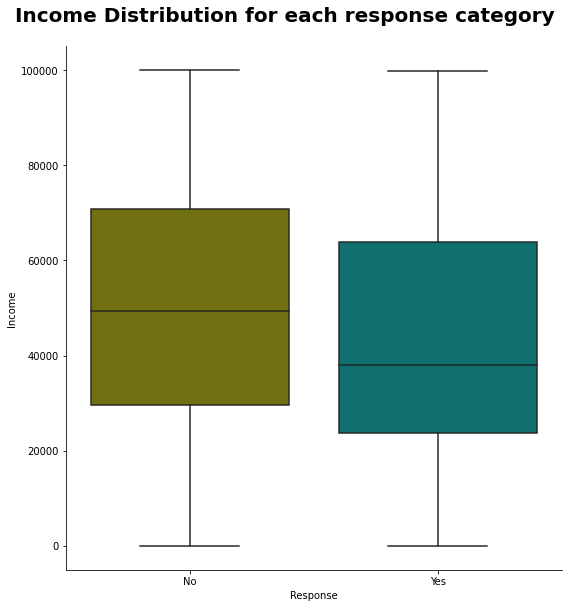

In [28]:
fgincome = sns.catplot(x='Response', y = 'Income', data = response_income, kind="box", margin_titles = True, height = 8, palette= palette_used)

fgincome.fig.suptitle('Income Distribution for each response category', size='20', fontweight='bold', y = 1.05)
fgincome.set_xticklabels(['No', 'Yes'])
fgincome.set_ylabels('Income')
fgincome.set_xlabels('Response')

In [29]:
### which states are our best market; highest number of client value
state_value = data1[['State','Customer Lifetime Value']]


<AxesSubplot:title={'center':'Value Concentration by State'}, xlabel='State', ylabel='Customer Lifetime Value'>

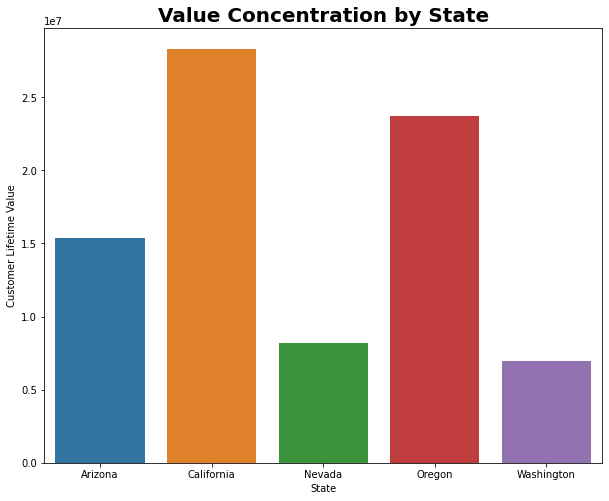

In [30]:
state_value = state_value.groupby(['State'])['Customer Lifetime Value'].agg(sum) ## groups by state and sums customer value
state_value = pd.DataFrame(state_value).reset_index() ## reassign data into a data frame and reset index to be able to work it 

## present data in a barplot
state_value_fig, ax = plt.subplots(figsize = (10, 8)) 
ax.set_title('Value Concentration by State', size='20', fontweight='bold')
sns.barplot(x= 'State', y= 'Customer Lifetime Value', data = state_value)

<AxesSubplot:>

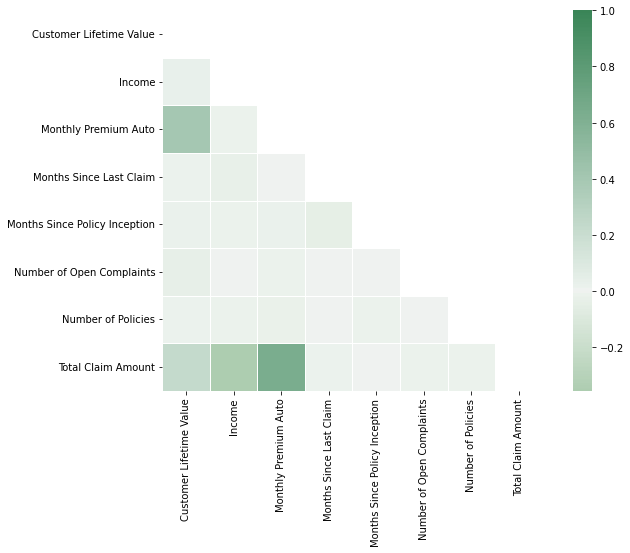

In [31]:
corr = numerical.corr() ## generate matrix

mask = np.triu(np.ones_like(corr, dtype=bool)) ## mask upper quadrant

figheat, ax = plt.subplots(figsize=(11,7)) ## chooses figure size
 
dmap = sns.diverging_palette(490, 500, as_cmap = True) ## selects palette

sns.heatmap(corr, mask=mask, cmap=dmap, vmax= 1, center=0, square=True, linewidths=.5)

<AxesSubplot:title={'center':'Policy Value Study'}, xlabel='Policy', ylabel='Customer Lifetime Value'>

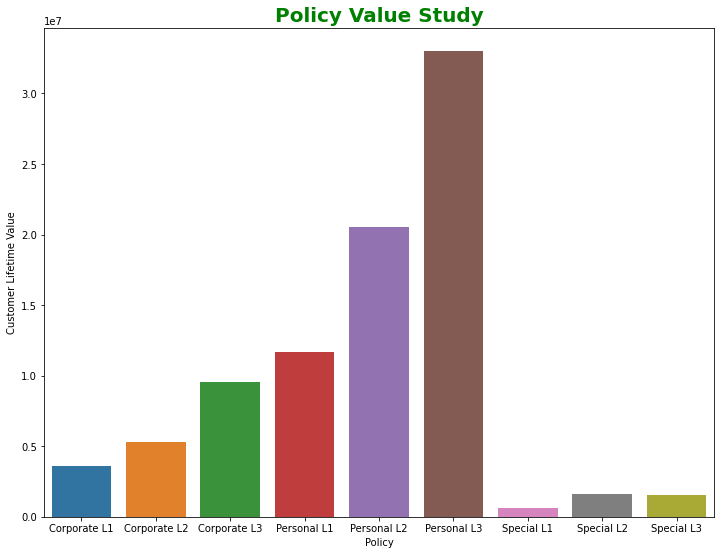

In [32]:
policy_value = data1[['Policy','Customer Lifetime Value']]

policy_value = policy_value.groupby(['Policy'])['Customer Lifetime Value'].agg(sum)
policy_value = pd.DataFrame(policy_value).reset_index()
policy_value


policy_value_fig, ax = plt.subplots(figsize = (12, 9)) 
ax.set_title('Policy Value Study', size='20', fontweight='bold', c = 'green')
sns.barplot(x= 'Policy', y= 'Customer Lifetime Value', data = policy_value, )

X-y split.
 Normalize (numerical).   
  One Hot/Label Encoding (categorical).


In [33]:
data1 = data1.dropna()

In [34]:
data1=data1.reset_index(drop=True)

In [36]:
data1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,new_column
0,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
1,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
2,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,January
3,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,66334,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,January
4,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,76717,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,February


# Defining X, y


In [37]:
X=data1.drop('Total Claim Amount', axis=1)
y=data1["Total Claim Amount"]

# Data splitting


In [38]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=123)


In [40]:
X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()
X_train.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
count,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000
mean,8048.438216,37499.027243,93.678041,14.985416,47.710787,0.375619,2.998074
std,6802.606560,30317.093228,34.829036,10.146684,28.102252,0.897174,2.399364
min,1918.119700,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000
25%,4095.744188,0.000000,69.000000,6.000000,23.000000,0.000000,1.000000
50%,5894.138140,34488.500000,83.000000,14.000000,47.000000,0.000000,2.000000
75%,9020.517214,61734.250000,110.000000,23.000000,71.000000,0.000000,4.000000
max,66025.754070,99961.000000,298.000000,35.000000,99.000000,5.000000,9.000000


# Variance threshold method


In [41]:
from sklearn.feature_selection import VarianceThreshold # It only works with numerical features



#display(X_train)
print("Initial number of numerical columns: ",X_train.shape)
print()


selector = VarianceThreshold(threshold=100) # Default threshold value is 0
# Features with a training-set variance lower than this threshold will be removed.
selector.fit(X_train)

kept_features_indexes = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features_indexes].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final number of numerical columns: ",X_train.shape)
print()
X_train

Initial number of numerical columns:  (3634, 7)

Final number of numerical columns:  (3634, 5)



,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception
0,11638.899470,25370.0,102.0,10.0,77.0
1,5380.312218,93818.0,66.0,7.0,25.0
2,14590.245830,46244.0,62.0,8.0,3.0
3,6285.476868,32390.0,80.0,20.0,36.0
4,7824.372789,32823.0,100.0,1.0,36.0
...,...,...,...,...,...
3629,7637.111954,0.0,71.0,1.0,29.0
3630,2705.987629,0.0,83.0,15.0,85.0
3631,5824.224192,73976.0,73.0,27.0,84.0
3632,19378.907800,21159.0,73.0,35.0,14.0


# Correlation matrix


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

c = abs(data1.corr())
#c

#fig, ax = plt.subplots(figsize=(14,14))
#sns.heatmap(c, annot=True);

#c['SalePrice']
c_last = c['Total Claim Amount'].sort_values(ascending=False)
#c_last
c_thr = .3
cols_to_keep = list(c_last[c_last > c_thr].index)[1:] + [list(c_last[c_last > c_thr].index)[0]]
print(cols_to_keep)

data1[cols_to_keep]

['Monthly Premium Auto', 'Income', 'Total Claim Amount']


,Monthly Premium Auto,Income,Total Claim Amount
0,100,22139,480.000000
1,97,49078,484.013411
2,127,82730,442.521087
3,69,66334,331.200000
4,66,76717,300.528579
...,...,...,...
4538,91,28304,655.200000
4539,74,59855,355.200000
4540,187,0,897.600000
4541,65,61146,273.018929


# Recursive feature elimination


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  ## recursive feature elemination technique

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#X_train.isna().sum()
nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 8, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Final selected features: 


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,5953.213546,61006.0,74.0,6.0,99.0,0.0,9.0
1,5221.144690,60445.0,65.0,8.0,53.0,0.0,8.0
2,5107.163002,35625.0,65.0,10.0,56.0,1.0,3.0
3,5416.413581,53249.0,67.0,32.0,10.0,0.0,3.0
4,3961.586180,0.0,118.0,6.0,34.0,1.0,1.0
...,...,...,...,...,...,...,...
3629,7572.237727,12876.0,107.0,8.0,90.0,2.0,3.0
3630,6273.911874,18577.0,86.0,21.0,76.0,0.0,6.0
3631,2404.633766,22239.0,62.0,34.0,85.0,0.0,1.0
3632,3939.006370,60021.0,99.0,12.0,28.0,0.0,1.0


# Embedded Methods


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)


In [46]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train=imp_mean.fit_transform(X_train)

In [47]:
X_train


array([[8.51675137e+03, 3.75730000e+04, 1.12000000e+02, ...,
        2.10000000e+01, 3.00000000e+00, 3.00000000e+00],
       [4.42803158e+03, 5.85770000e+04, 1.10000000e+02, ...,
        6.20000000e+01, 0.00000000e+00, 1.00000000e+00],
       [3.10648254e+03, 2.20760000e+04, 8.50000000e+01, ...,
        5.30000000e+01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [2.40463377e+03, 2.22390000e+04, 6.20000000e+01, ...,
        8.50000000e+01, 0.00000000e+00, 1.00000000e+00],
       [3.93900637e+03, 6.00210000e+04, 9.90000000e+01, ...,
        2.80000000e+01, 0.00000000e+00, 1.00000000e+00],
       [3.55484526e+03, 5.85570000e+04, 8.80000000e+01, ...,
        8.30000000e+01, 0.00000000e+00, 1.00000000e+00]])

In [48]:
model=LinearRegression()
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

LinearRegression: Train -> 0.5315854563001869, Test -> 0.495801694924774


/Users/tuncaynasibli/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [49]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0.05)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.5315854187073598, Test -> 0.4958211723634901


/Users/tuncaynasibli/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [55]:
model=Ridge(alpha=10000)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.531360955680348, Test -> 0.49715849054391137


/Users/tuncaynasibli/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [51]:

model=ElasticNet(alpha=0.1)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

ElasticNet: Train -> 0.5315841815696236, Test -> 0.49591909058929107


/Users/tuncaynasibli/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


In [192]:
std_scaler=StandardScaler().fit(X_trained_num)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_trained_num)

In [193]:
X_train_scaled

array([[-0.41576668,  0.77857914, -0.82777864, ...,  0.72792966,
        -0.41998058,  1.26084604],
       [ 1.23541236,  0.30144517, -0.68280706, ...,  1.18971359,
        -0.41998058, -0.41343746],
       [-0.16427994,  0.53799582, -0.16090934, ...,  1.544932  ,
        -0.41998058,  1.67941691],
       ...,
       [-0.33315365,  1.19922291, -0.5958241 , ...,  1.29627912,
        -0.41998058,  0.00513342],
       [ 1.64955612, -0.53243274, -0.5958241 , ..., -1.19024977,
        -0.41998058, -0.41343746],
       [ 3.06415205, -0.53535069,  2.94148262, ..., -0.01802901,
        -0.41998058, -0.41343746]])

In [194]:
X_test_num=X_test._get_numeric_data()


In [195]:
X_test_scaled=std_scaler.transform(X_test_num)

In [196]:
X_test_scaled

array([[-0.58362539,  0.90772301,  0.27400542, ...,  0.26614572,
        -0.41998058, -0.83200833],
       [ 1.50634132, -1.22615071, -0.5958241 , ..., -1.40338082,
        -0.41998058, -0.41343746],
       [ 0.16624077, -1.22615071,  0.99886335, ..., -0.76398768,
        -0.41998058,  0.84227516],
       ...,
       [-0.45985812, -0.47725399, -0.82777864, ...,  0.19510204,
        -0.41998058,  2.51655865],
       [-0.08556768, -0.19414729,  0.01305656, ...,  1.04762623,
        -0.41998058,  0.00513342],
       [-0.60446299,  0.39819652,  0.21601678, ..., -0.65742215,
        -0.41998058, -0.83200833]])

In [197]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [198]:
y_pred = model.predict(X_test_scaled)

In [199]:
y_test

6783      480.073548
3775      525.600000
1481      921.600000
5094     1008.569798
6298      640.800000
            ...     
5646      495.670802
10541     446.084760
9882      468.000000
2952      146.950756
10529       0.769185
Name: Total Claim Amount, Length: 1363, dtype: float64

In [200]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})


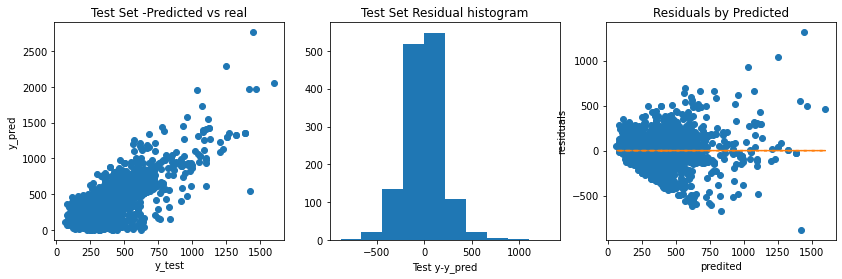

In [201]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [202]:
R2=r2_score(y_test,y_pred)
R2

0.5437391227132458

In [203]:
data1_cat= data1.select_dtypes("object")


In [204]:
data1_cat=pd.get_dummies(data1_cat[["Policy"]], drop_first=True)


In [205]:
data1_cat

,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3
2,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0
13,0,0,0,0,1,0,0,0
16,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
10902,0,0,0,1,0,0,0,0
10903,0,0,0,1,0,0,0,0
10904,0,0,0,1,0,0,0,0
10906,0,0,0,0,1,0,0,0
